### `PROJECT TITLE :- ` 
    --> Predicting Human Personality Traits through Behavioral Factor Analysis using Machine Learning.
### `DOMAIN INFORMATION :-` 
    --> Human Psychology, and Behavioral Analysis using Supervised Machine Learning.

### `BUSINESS PROBLEMS :-`

    1. Understanding Consumer Behavior :- Many businesses aim to understand their customers better to tailor their products or services accordingly. Predicting personality traits can provide valuable insights into consumer behavior, enabling companies to create more targeted marketing campaigns, design personalized products, and improve customer satisfaction.
    
    2. Employee Recruitment and Management: Human resource departments often struggle to identify the best candidates for job roles based solely on resumes and interviews. By predicting personality traits from behavioral data, companies can streamline the recruitment process, matching candidates with roles that align with their personalities, work styles, and preferences.
    
    3. Psychological Research and Analysis: Psychologists and researchers are constantly seeking ways to better understand human behavior and personality. Machine learning models predicting personality traits can assist in large-scale psychological studies, providing insights into how various factors influence personality development and behavior across different populations.
    
### `OBJECTIVE :-` 
    --> The primary objective of this project is to develop a machine learning model that can acurately predict human personality traits based on various behavioral factors, such as social media behavior, online activity, and demographic information. The model should be able to clasify individuals into one of the five major personality traits: extraverted, serious, responsible, lively, and dependable.

### `IMPORTING REQUIRED LIBRARIES`

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import joblib
import os
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

### `IMPORTING DATASET`

In [51]:
df = pd.read_csv(r"C:\Users\User\#DataScience-IRL-Hyd\AI-ML-Inn\Unsupervised ML\Perso Data csv.csv")

df.head()

,Unnamed: 0,Gender,Age,Openes,Neuroticism,Conscientiousnes,Agreablenes,Extraversion,Personality
0,0,Female,29,9,5,2,1,8,extraverted
1,1,Male,28,6,5,3,8,8,extraverted
2,2,Male,20,7,7,9,2,1,responsible
3,3,Male,27,3,1,1,1,2,dependable
4,4,Male,22,7,7,6,3,1,dependable


### `SHAPE OF DATASET`

In [3]:
df.shape

(1520, 9)

### ` FEATURES OF DATASET`

In [4]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Openes', 'Neuroticism',
       'Conscientiousnes', 'Agreablenes', 'Extraversion', 'Personality'],
      dtype='object')

### `INFORMATION OF DATASET`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1520 non-null   int64 
 1   Gender            1520 non-null   object
 2   Age               1520 non-null   int64 
 3   Openes            1520 non-null   int64 
 4   Neuroticism       1520 non-null   int64 
 5   Conscientiousnes  1520 non-null   int64 
 6   Agreablenes       1520 non-null   int64 
 7   Extraversion      1520 non-null   int64 
 8   Personality       1520 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.0+ KB


### `EXPLORATORY DATA ANALYSIS`

In [6]:
# DUPLICATE RECORDS IDENTIFICATION

df.duplicated().sum()

0

**`OBSERVATION:- There are no duplicated records present in the dataset`**

In [7]:
# MISSING VALUES INDENTIFICATION

df.isna().sum()

Unnamed: 0          0
Gender              0
Age                 0
Openes              0
Neuroticism         0
Conscientiousnes    0
Agreablenes         0
Extraversion        0
Personality         0
dtype: int64

**`OBSERVATION:- There are no missing values present in the dataset`**

In [8]:
# STRUCTURAL ERRORS IDENTIFICATION

for i in df.columns:
    print(i , df[i].unique())

Unnamed: 0 [   0    1    2 ... 1517 1518 1519]
Gender ['Female' 'Male']
Age [29 28 20 27 22 23 26 24 25 34 33 18 32 30 19 31 21]
Openes [9 6 7 3 8 4 2 5 1]
Neuroticism [5 7 1 8 6 9 4 2 3]
Conscientiousnes [2 3 9 1 6 4 8 5 7]
Agreablenes [1 8 2 3 6 7 5 9 4]
Extraversion [8 1 2 7 5 3 9 6 4]
Personality ['extraverted' 'responsible' 'dependable' 'serious' 'lively']


### `PLOTS AND INSIGHTS`

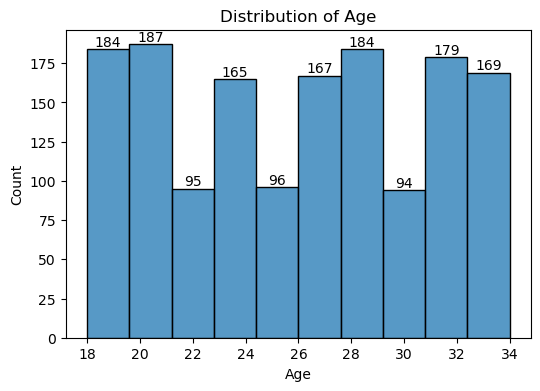

The minimum age present in dataset is :-  18
The maximum age present in dataset is :-  34


In [9]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data=df, x='Age', bins=10)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

print("The minimum age present in dataset is :- ",df['Age'].min())
print("The maximum age present in dataset is :- ",df['Age'].max())

**`OBSERBATION:-`**
* **`Minimum Age of person present in the dataset is '18'`**
* **`Maximum Age of person present in the dataset is '34'`**
* **`There are Most of the people is of 20 yr.`**
* **`There are Minimum people having age of 30 yr.`**
* **`Distribution of Age look like Normally Distribution`**

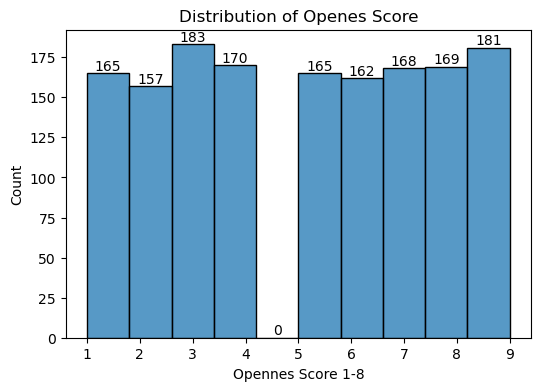

The minimum Openes score present in dataset is :-  1
The maximum Openes score present in dataset is :-  9


In [10]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data=df, x='Openes', bins=10)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of Openes Score")
plt.xlabel('Opennes Score 1-8')
plt.show()

print("The minimum Openes score present in dataset is :- ",df['Openes'].min())
print("The maximum Openes score present in dataset is :- ",df['Openes'].max())

In [11]:
df['Openes'].value_counts().nlargest(5)

3    183
9    181
4    170
8    169
7    168
Name: Openes, dtype: int64

In [12]:
df['Openes'].value_counts().nsmallest(5)

2    157
6    162
5    165
1    165
7    168
Name: Openes, dtype: int64

**`OBSERBATION:-`**
* **`Minimum Openness score of person present in the dataset is '1'`**
* **`Maximum Openness score of person present in the dataset is '9'`**
* **`There are Most of the people having 3 Openness score.`**
* **`There are Minimum people having 2 Openness score.`**
* **`Distribution of Openness look like SOME NORMALLY DISTRIBUTION`**

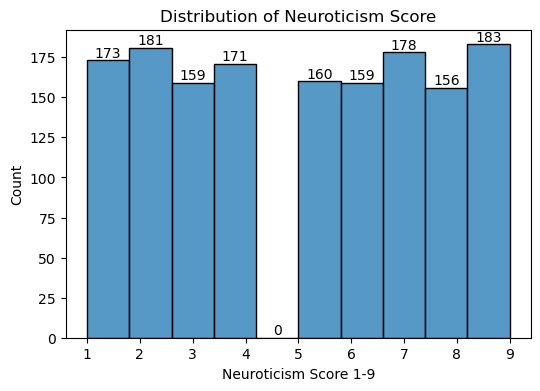

The minimum Neuroticism score present in dataset is :-  1
The maximum Neuroticism score present in dataset is :-  9


In [13]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data=df, x='Neuroticism', bins=10)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of Neuroticism Score")
plt.xlabel('Neuroticism Score 1-9')
plt.show()

print("The minimum Neuroticism score present in dataset is :- ",df['Neuroticism'].min())
print("The maximum Neuroticism score present in dataset is :- ",df['Neuroticism'].max())

In [14]:
df['Neuroticism'].value_counts().nlargest(5)

9    183
2    181
7    178
1    173
4    171
Name: Neuroticism, dtype: int64

In [15]:
df['Neuroticism'].value_counts().nsmallest(5)

8    156
6    159
3    159
5    160
4    171
Name: Neuroticism, dtype: int64

**`OBSERBATION:-`**
* **`Minimum Neuroticism score of person present in the dataset is '1'`**
* **`Maximum Neuroticism score of person present in the dataset is '9'`**
* **`There are Most of the people having 9 Neuroticism score.`**
* **`There are Minimum people having 8 Neuroticism score.`**
* **`Distribution of Neuroticism Score look like NORMALLY DISTRIBUTION`**

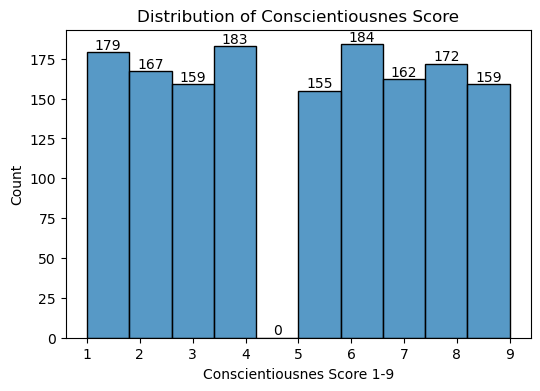

The minimum Conscientiousnes score present in dataset is :-  1
The maximum Conscientiousnes score present in dataset is :-  9


In [16]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data=df, x='Conscientiousnes', bins=10)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of Conscientiousnes Score")
plt.xlabel('Conscientiousnes Score 1-9')
plt.show()

print("The minimum Conscientiousnes score present in dataset is :- ",df['Conscientiousnes'].min())
print("The maximum Conscientiousnes score present in dataset is :- ",df['Conscientiousnes'].max())

In [17]:
df['Conscientiousnes'].value_counts().nlargest(5)

6    184
4    183
1    179
8    172
2    167
Name: Conscientiousnes, dtype: int64

In [18]:
df['Conscientiousnes'].value_counts().nsmallest(5)

5    155
3    159
9    159
7    162
2    167
Name: Conscientiousnes, dtype: int64

**`OBSERBATION:-`**
* **`Minimum Conscientiousness score of person present in the dataset is '1'`**
* **`Maximum Conscientiousness score of person present in the dataset is '9'`**
* **`There are Most of the people having 6 Conscientiousness score.`**
* **`There are Minimum people having 5 Conscientiousness score.`**
* **`Distribution of Conscientiousness Score look like NORMALLY DISTRIBUTION`**

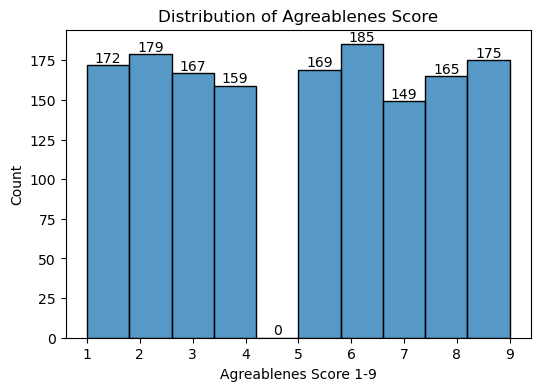

The minimum Agreablenes score present in dataset is :-  1
The maximum Agreablenes score present in dataset is :-  9


In [19]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data=df, x='Agreablenes', bins=10)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of Agreablenes Score")
plt.xlabel('Agreablenes Score 1-9')
plt.show()

print("The minimum Agreablenes score present in dataset is :- ",df['Agreablenes'].min())
print("The maximum Agreablenes score present in dataset is :- ",df['Agreablenes'].max())

In [20]:
df['Agreablenes'].value_counts().nlargest(5)

6    185
2    179
9    175
1    172
5    169
Name: Agreablenes, dtype: int64

In [21]:
df['Agreablenes'].value_counts().nsmallest(5)

7    149
4    159
8    165
3    167
5    169
Name: Agreablenes, dtype: int64

**`OBSERBATION:-`**
* **`Minimum Agreeableness score of person present in the dataset is '1'`**
* **`Maximum Agreeableness score of person present in the dataset is '9'`**
* **`There are Most of the people having 6 Agreeableness score.`**
* **`There are Minimum people having 7 Agreeableness score.`**
* **`Distribution of Agreeableness Score look like NORMALLY DISTRIBUTION`**

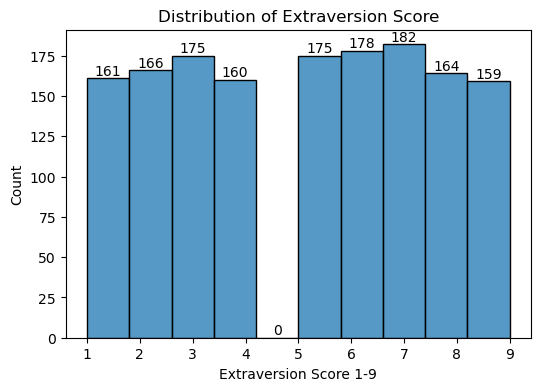

The minimum Extraversion score present in dataset is :-  1
The maximum Extraversion score present in dataset is :-  9


In [22]:
plt.figure(figsize=(6,4))
ax = sns.histplot(data=df, x='Extraversion', bins=10)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Distribution of Extraversion Score")
plt.xlabel('Extraversion Score 1-9')
plt.show()

print("The minimum Extraversion score present in dataset is :- ",df['Extraversion'].min())
print("The maximum Extraversion score present in dataset is :- ",df['Extraversion'].max())

In [23]:
df['Extraversion'].value_counts().nlargest(5)

7    182
6    178
5    175
3    175
2    166
Name: Extraversion, dtype: int64

In [24]:
df['Extraversion'].value_counts().nsmallest(5)

9    159
4    160
1    161
8    164
2    166
Name: Extraversion, dtype: int64

**`OBSERBATION:-`**
* **`Minimum Extraversion score of person present in the dataset is '1'`**
* **`Maximum Extraversion score of person present in the dataset is '9'`**
* **`There are Most of the people having 7 Extraversion score.`**
* **`There are Minimum people having 9 Extraversion score.`**
* **`Distribution of Extraversion Score look like NORMALLY DISTRIBUTION`**

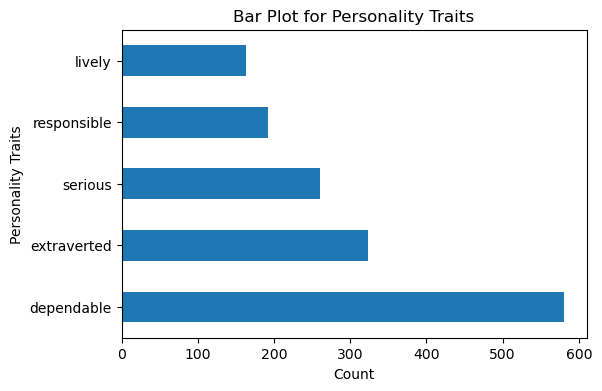

In [25]:
ax = df['Personality'].value_counts().plot(kind='barh',
                                           figsize=(6,4),
                                           title='Bar Plot for Personality Traits',
                                           xlabel='Count',
                                           ylabel='Personality Traits')

In [26]:
df['Personality'].value_counts()

dependable     581
extraverted    323
serious        261
responsible    192
lively         163
Name: Personality, dtype: int64

**`OBSERBATION:-`**
* **`There are Most of the people having SERIOUS PERSONALITY TRAITS.`**
* **`There are Less people having 8 LIVELY PERSONALITY TRAITS.`**

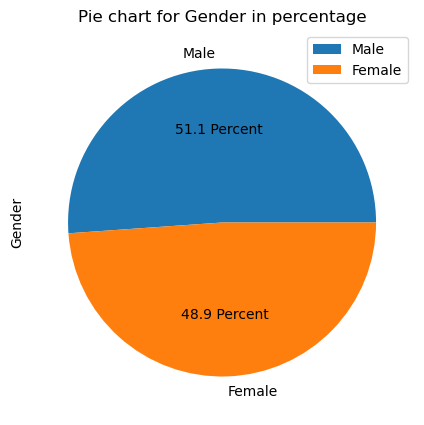

In [27]:
(df['Gender'].value_counts()/len(df['Gender'])*100).plot(kind='pie',
                               figsize = (6,5),
                               legend = True,
                               autopct = '%1.1f'+' Percent' ,                   
                               ylabel = 'Gender',
                               grid = True,
                               title = 'Pie chart for Gender in percentage')
plt.show()

**`OBSERVATION:-`**
* **`There are 47.6 % of Male in dataset`**
* **`There are 52.4 % of Female in dataset`**

### `RELATIONSHIPS BETWEEN FEATURES`

<Axes: xlabel='Age', ylabel='Openes'>

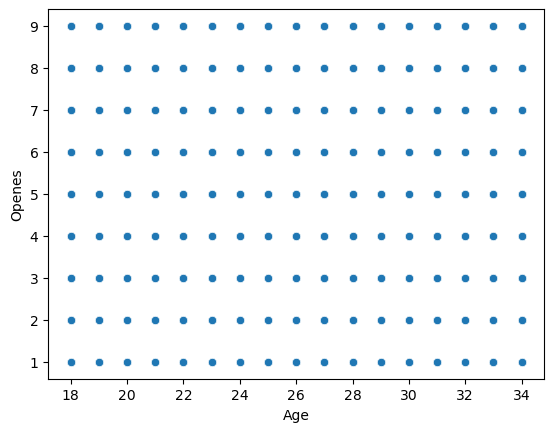

In [28]:
sns.scatterplot(data = df , x = 'Age' , y = 'Openes')

<Axes: xlabel='Neuroticism', ylabel='Openes'>

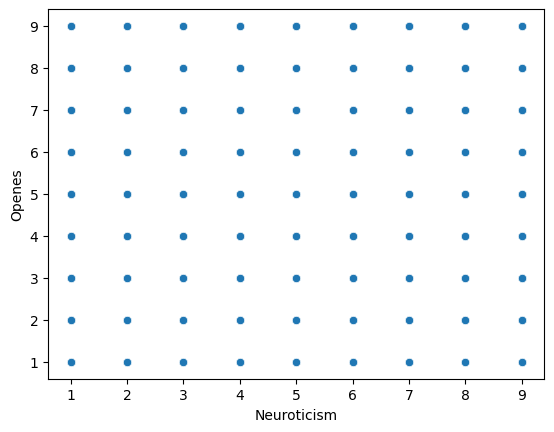

In [29]:
sns.scatterplot(data = df , x = 'Neuroticism' , y = 'Openes')

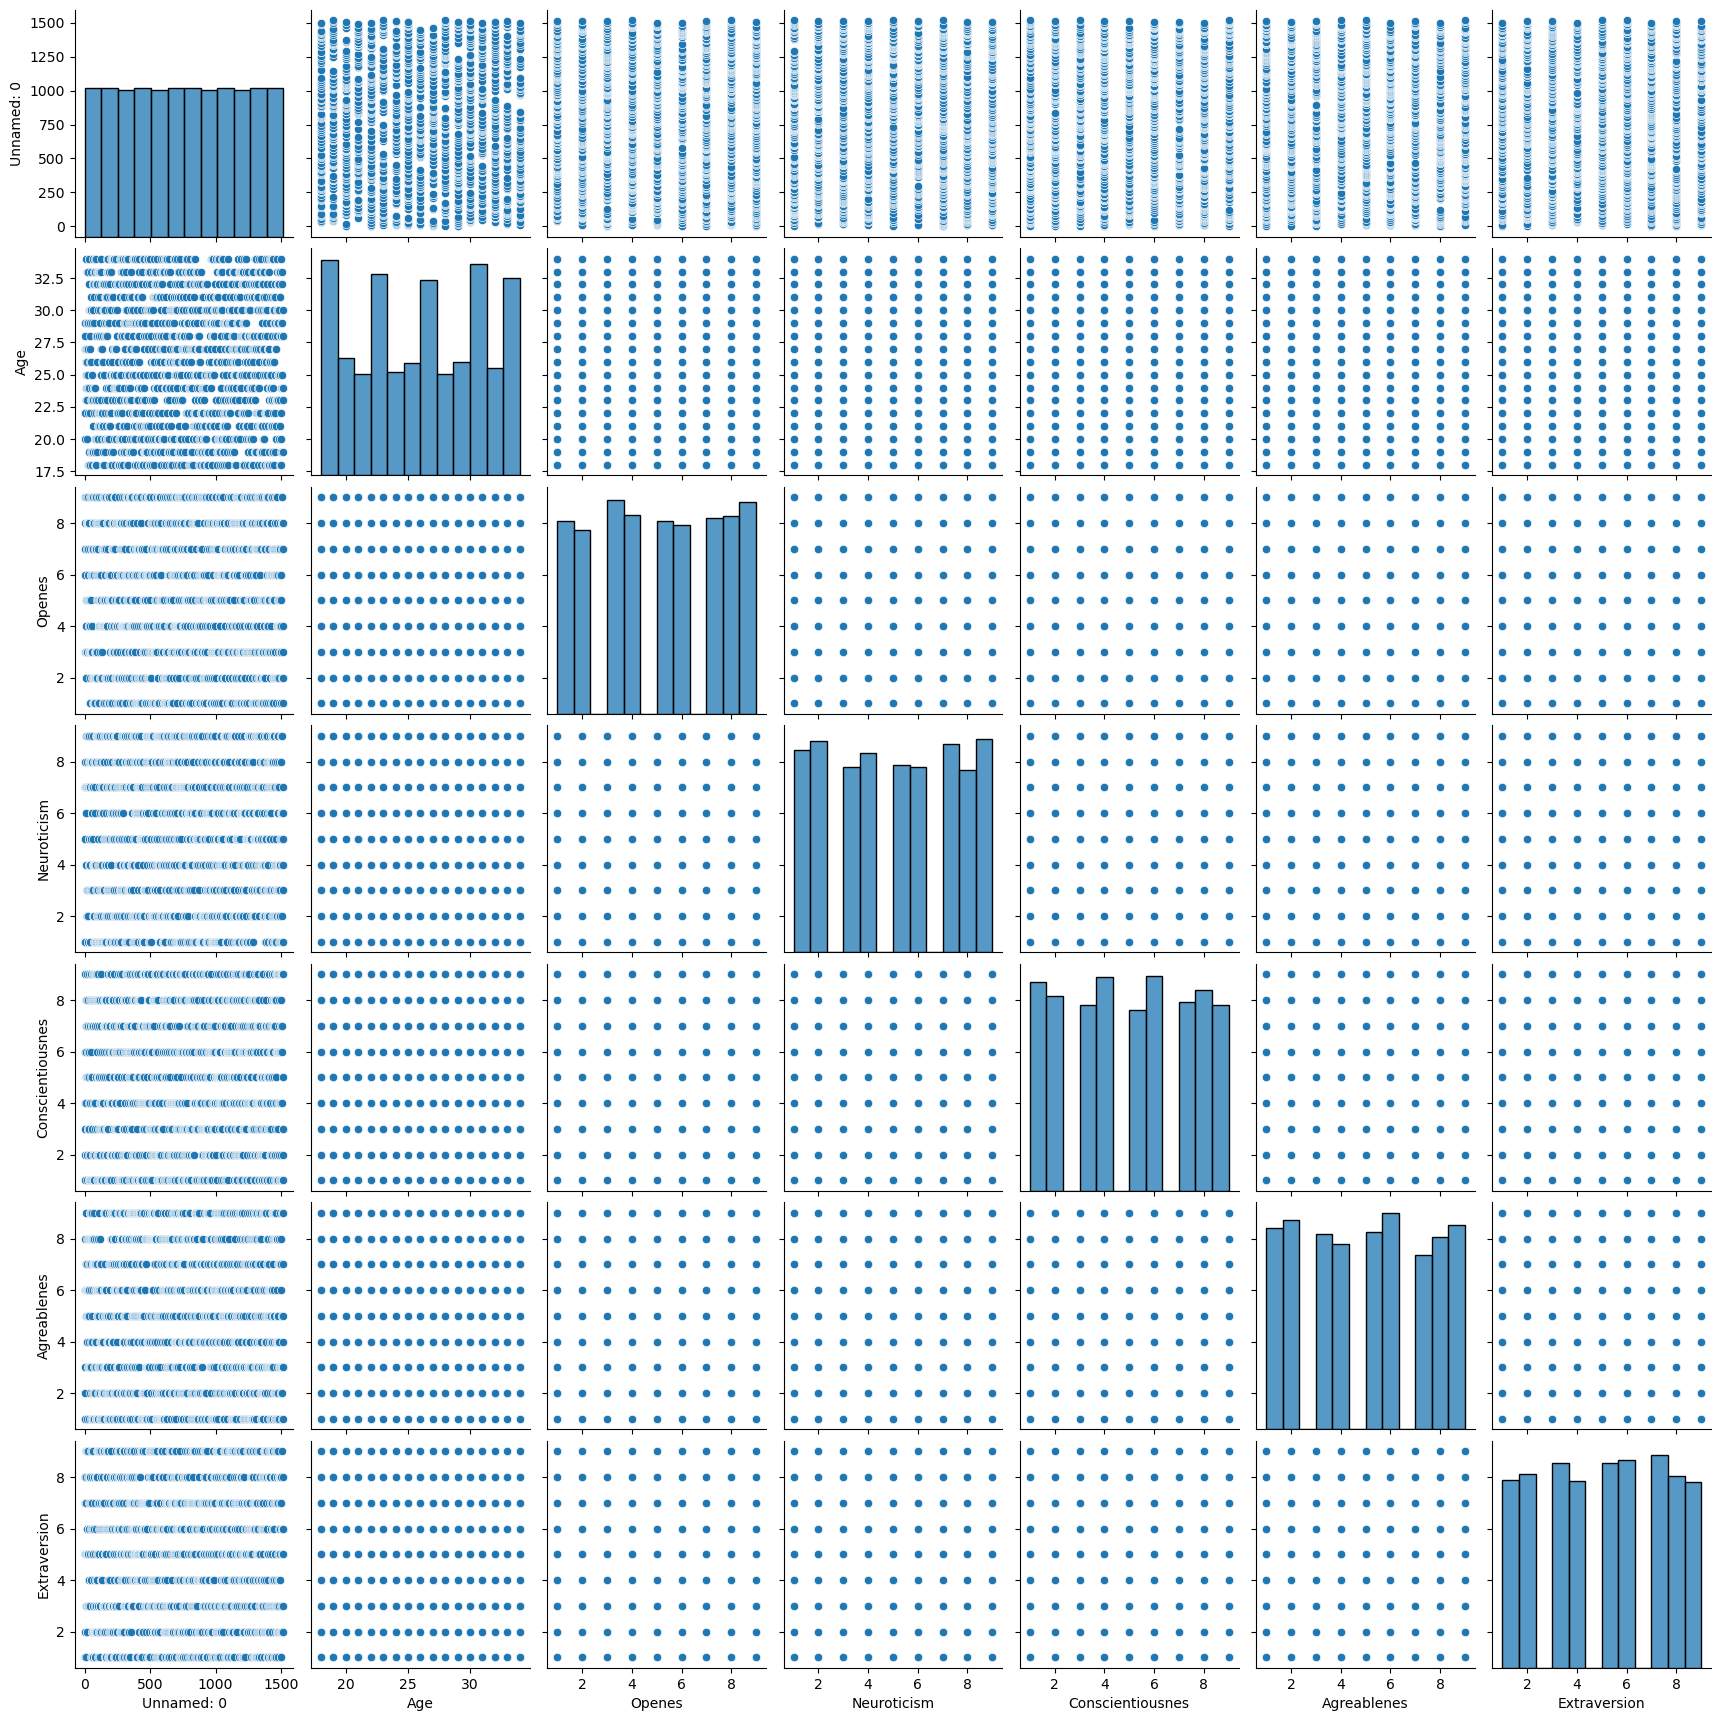

In [30]:
sns.pairplot(df)

**`OBSERVATION:- `**
* **`There is no relationship between AGE and Other features.`**

<Axes: >

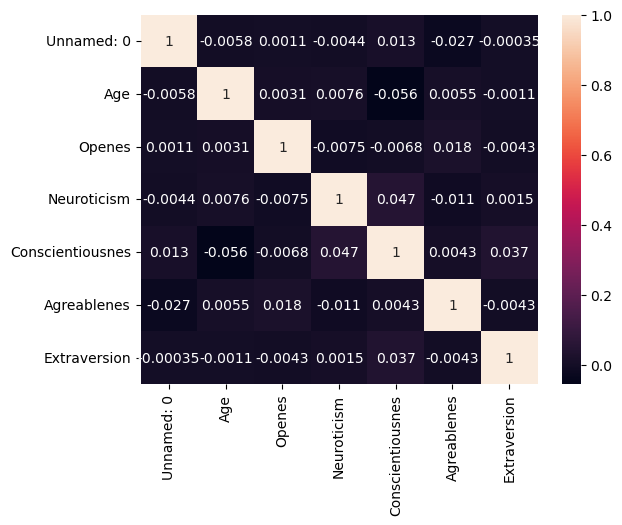

In [31]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

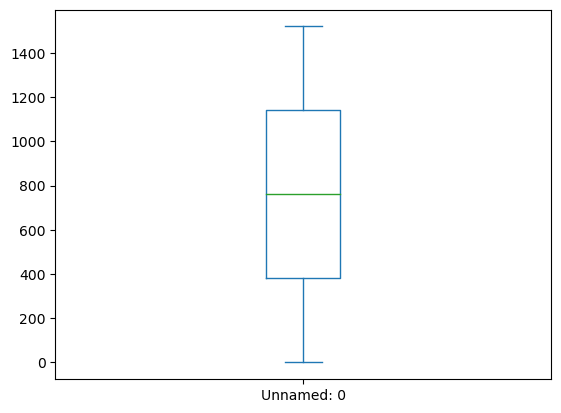

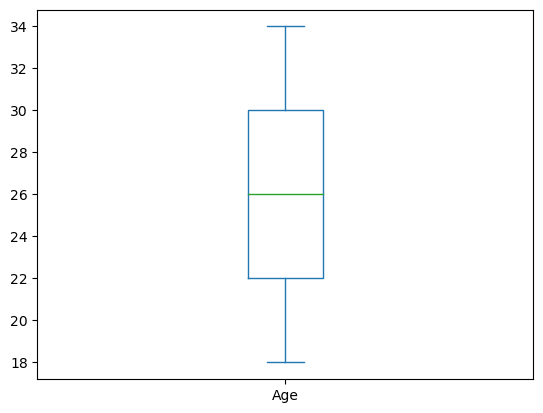

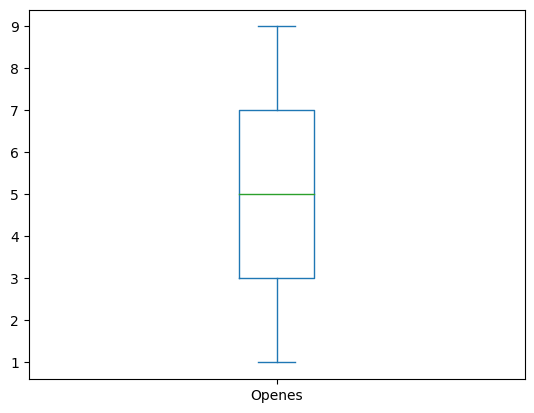

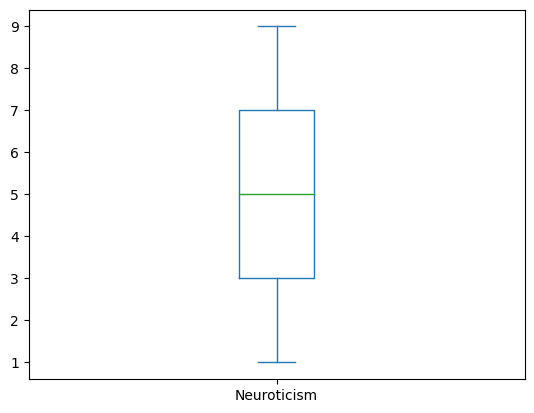

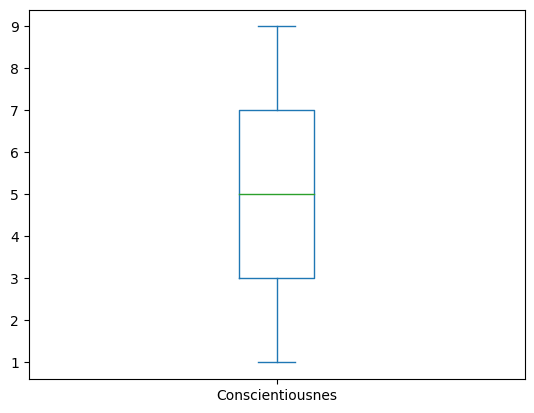

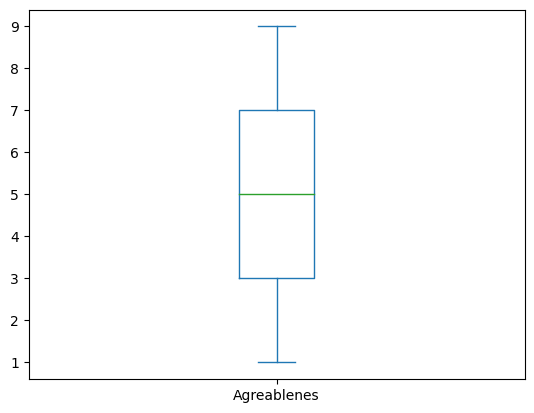

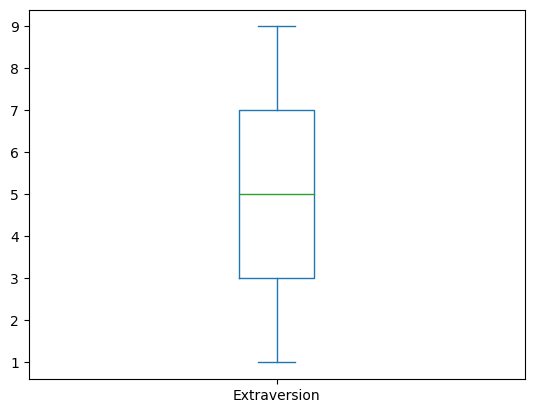

In [32]:
for i in df.select_dtypes(exclude=['object']).columns:
    df[i].plot.box()
    plt.show()

**`OBSERVATION:- There is no outliers in each features.`**

### `STATISTICAL ANALYSIS`

In [33]:
df.describe()

,Unnamed: 0,Age,Openes,Neuroticism,Conscientiousnes,Agreablenes,Extraversion
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,759.500000,25.926316,5.040789,4.994079,4.961842,4.973684,5.011842
std,438.930518,4.911042,2.591762,2.617476,2.579581,2.598291,2.547222
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,379.750000,22.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,759.500000,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,1139.250000,30.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,1519.000000,34.000000,9.000000,9.000000,9.000000,9.000000,9.000000


### `FEATURE SELECTION`

In [34]:
df.head()

,Unnamed: 0,Gender,Age,Openes,Neuroticism,Conscientiousnes,Agreablenes,Extraversion,Personality
0,0,Female,29,9,5,2,1,8,extraverted
1,1,Male,28,6,5,3,8,8,extraverted
2,2,Male,20,7,7,9,2,1,responsible
3,3,Male,27,3,1,1,1,2,dependable
4,4,Male,22,7,7,6,3,1,dependable


In [52]:
df.drop('Unnamed: 0' , axis=1 , inplace=True)

In [36]:
df.var()

Age                 24.118333
Openes               6.717229
Neuroticism          6.851183
Conscientiousnes     6.654238
Agreablenes          6.751117
Extraversion         6.488339
dtype: float64

In [37]:
df_num = df.select_dtypes(exclude='object')
var = VarianceThreshold(threshold=0.5)
var.fit(df_num)
df_sele = pd.DataFrame(var.transform(df_num) , columns=var.get_feature_names_out())
df_sele

,Age,Openes,Neuroticism,Conscientiousnes,Agreablenes,Extraversion
0,29,9,5,2,1,8
1,28,6,5,3,8,8
2,20,7,7,9,2,1
3,27,3,1,1,1,2
4,22,7,7,6,3,1
...,...,...,...,...,...,...
1515,28,2,4,2,9,3
1516,24,3,3,1,3,8
1517,23,8,7,3,5,5
1518,28,8,5,9,9,5


**`OBSERVATION:- There was only one feature that is not useful for analysis, I will drop that feature 'Unnamed: 0'`**

### `DATA PREPROCESSING AND MODEL BUILDING USING MACHINE LEARNING PIPELINES`

In [53]:
X = df.drop("Personality" , axis=1)
y = df['Personality']

X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2 , random_state=23)



In [54]:
X

,Gender,Age,Openes,Neuroticism,Conscientiousnes,Agreablenes,Extraversion
0,Female,29,9,5,2,1,8
1,Male,28,6,5,3,8,8
2,Male,20,7,7,9,2,1
3,Male,27,3,1,1,1,2
4,Male,22,7,7,6,3,1
...,...,...,...,...,...,...,...
1515,Male,28,2,4,2,9,3
1516,Male,24,3,3,1,3,8
1517,Male,23,8,7,3,5,5
1518,Male,28,8,5,9,9,5


In [55]:
lab = LabelEncoder()

X_train['Gender'] = lab.fit_transform(X_train['Gender'])
X_test['Gender'] = lab.fit_transform(X_test['Gender'])

X_train

,Gender,Age,Openes,Neuroticism,Conscientiousnes,Agreablenes,Extraversion
233,0,30,9,2,2,6,3
730,0,20,7,7,9,6,4
182,0,20,1,1,5,9,4
643,1,19,6,5,9,2,7
809,1,19,7,9,5,2,7
...,...,...,...,...,...,...,...
1512,1,28,7,1,3,1,6
950,0,21,9,5,5,5,6
1064,1,21,5,3,6,5,5
742,0,23,1,9,2,9,1


In [56]:
X_test

,Gender,Age,Openes,Neuroticism,Conscientiousnes,Agreablenes,Extraversion
1255,0,31,8,6,6,4,4
696,1,18,6,7,4,8,1
457,0,21,4,5,9,1,7
1068,1,26,2,2,4,9,9
789,1,33,2,7,5,4,5
...,...,...,...,...,...,...,...
500,0,23,6,5,1,8,3
806,1,31,5,4,3,3,5
151,1,20,7,9,6,9,9
215,0,25,3,1,3,9,5


In [57]:
pipelines = {
    'knn' : Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]), 
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'knn': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    'logistic_regression': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'decision_tree': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {
            'scaler': [StandardScaler(), MinMaxScaler()]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for i in pipelines.keys():
    print("*"*10, i, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[i], 
                               param_grid=param_grids[i], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train, y_train)
    
    best_models[i] = grid_search.best_estimator_
    
    print('Accuracy Score on Test Data: ', grid_search.score(X_test, y_test))

********** knn **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 28.4 s
Wall time: 28.5 s
Accuracy Score on Test Data:  0.875
********** logistic_regression **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 24.6 s
Wall time: 6.18 s
Accuracy Score on Test Data:  0.9901315789473685
********** decision_tree **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 1 s
Wall time: 390 ms
Accuracy Score on Test Data:  1.0
********** naive_bayes **********
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 141 ms
Wall time: 137 ms
Accuracy Score on Test Data:  1.0


In [58]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

knn
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=15, p=1))])

logistic_regression
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=10, l1_ratio=0.5, penalty='elasticnet',
                                    solver='saga'))])

decision_tree
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

naive_bayes
Pipeline(steps=[('scaler', StandardScaler()), ('classifier', GaussianNB())])



In [46]:
for name, model in best_models.items():
    print("_"*30)
    print("*"*10, name, "*"*10)
    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')
    
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score", metrics.accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")

______________________________
********** knn **********
CPU times: total: 31.2 ms
Wall time: 27 ms
Accuracy Score 0.875
Model Size: 167389 Bytes
______________________________
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 2 ms
Accuracy Score 0.9901315789473685
Model Size: 2446 Bytes
______________________________
********** decision_tree **********
CPU times: total: 62.5 ms
Wall time: 2 ms
Accuracy Score 1.0
Model Size: 3448 Bytes
______________________________
********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 2 ms
Accuracy Score 1.0
Model Size: 2614 Bytes


**`OBSERVATION:- NAIVE BAYES performing well with minimum time and space as compare to other algorithm `**

### `MACHINE LEARNING MODEL EVALUATION`

In [47]:
print("ML MODEL EVALUATION")
for name, model in best_models.items():
    print("_"*50)
    print("*"*15, name, "*"*15)
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score:- ", metrics.accuracy_score(y_test, y_test_pred))
    print("F-1 Score:- ",metrics.f1_score(y_test, y_test_pred,average= 'weighted'))
    print("Recall Score:- ",metrics.recall_score(y_test, y_test_pred,average= 'weighted'))

ML MODEL EVALUATION
__________________________________________________
*************** knn ***************
CPU times: total: 31.2 ms
Wall time: 24 ms
Accuracy Score:-  0.875
F-1 Score:-  0.8705082095001283
Recall Score:-  0.875
__________________________________________________
*************** logistic_regression ***************
CPU times: total: 0 ns
Wall time: 2 ms
Accuracy Score:-  0.9901315789473685
F-1 Score:-  0.9901408771882084
Recall Score:-  0.9901315789473685
__________________________________________________
*************** decision_tree ***************
CPU times: total: 62.5 ms
Wall time: 2 ms
Accuracy Score:-  1.0
F-1 Score:-  1.0
Recall Score:-  1.0
__________________________________________________
*************** naive_bayes ***************
CPU times: total: 0 ns
Wall time: 2 ms
Accuracy Score:-  1.0
F-1 Score:-  1.0
Recall Score:-  1.0


**`BEST PERFORMING MODEL IS NAIVY BAYES`**

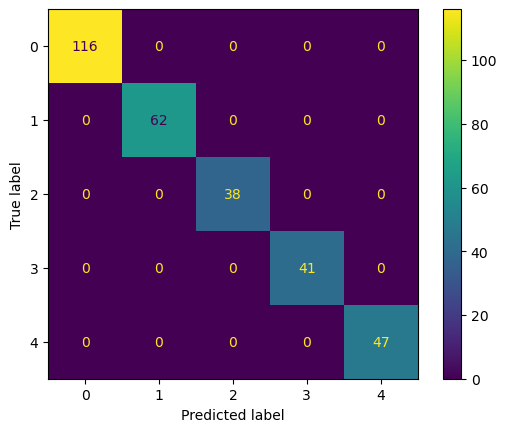

In [48]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_test_pred)).plot()

### `-----------------------------------------THANK YOU----------------------------------------------`